# Examples using Randomized Data

This page illustrates how to use the the primary functions provided by this package in 2 contexts using randomized data. This is useful for understanding the arguments of the functions. However, the resulting plots won't look particularly meaningful.

For some examples that use real simulation data, see [this page](Example-simulation.ipynb).

This package primarily provides 2 functions: `vsf_props` and `twopoint_correlation`.

For a single set of points, we can compute an "auto" n-th order structure function (the typical kind of structure function) and the "auto" correlation function. For a discrete set of points, that sample a vector field, ${\bf v}({\bf r})$ (commonly a velocity-field), and a scalar field, $\rho({\bf r})$ (commonly density field), these functions respectively are defined as:

$$
\langle|\delta {\bf v}|^n\rangle(\ell) = 
    \frac{\sum_i \sum_{j\neq i} W_\ell(|{\bf r}_i-{\bf r}_j|) |{\bf v}({\bf r}_i) - {\bf v}({\bf r}_j)|^n }{\sum_i\sum_{j\neq i} W_\ell(|{\bf r}_i-{\bf r}_j|)}
$$

and

$$
\xi(\ell) = 
    \frac{\sum_i \sum_{j\neq i} W_\ell(|{\bf r}_i-{\bf r}_j|) \rho({\bf r}_i)\rho({\bf r}_j) }{\sum_i\sum_{j\neq i} W_\ell(|{\bf r}_i-{\bf r}_j|)}.
$$

In these equations, $W_\ell(|{\bf r}_i-{\bf r}_j|)$ evaluates to 1 when $|{\bf r}_i-{\bf r}_j|$ falls within the $\ell$ bin and is 0 otherwise. (When performing certain types of velocity structure function calculations we also support specifying additional weights for each point, but we don't show that here)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot_binned_data(ax, bin_edges, vals, **kwargs):
    return ax.stairs(vals, edges = bin_edges, **kwargs)

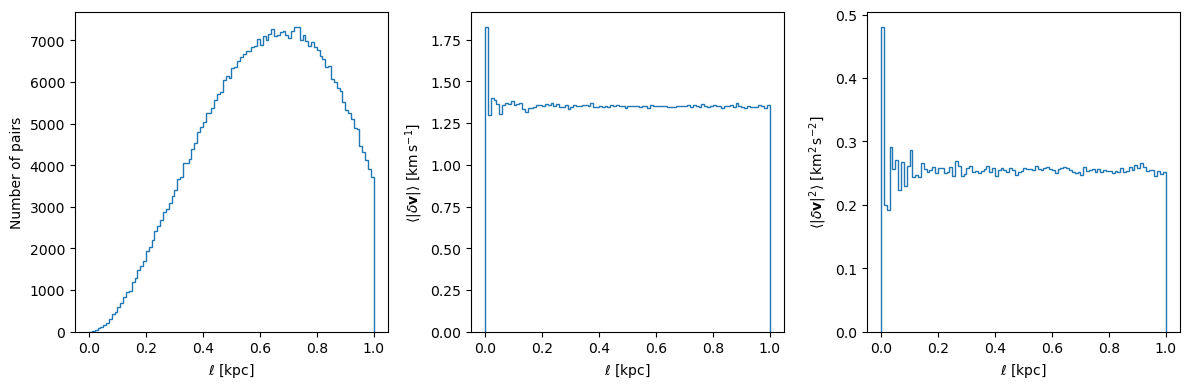

In [2]:
# generate some random positions and velocities:
generator = np.random.RandomState(seed=156)
pos = generator.rand(3, 1000)
vel = generator.rand(3, 1000) * 2 - 1.0

# for the sake of example, let's imagine that the positions have units of kpc,
# and that the velocities have units of km/s

from pyvsf import vsf_props

# separation bins
dist_bin_edges = np.arange(101.0) / 100

vsf_result_dict = vsf_props(
    pos_a=pos, val_a=vel,
    pos_b=None, val_b=None,
    dist_bin_edges=dist_bin_edges,
    stat_kw_pairs=[("variance", {})],
    nproc=1,
)[0]


fig, ax_arr = plt.subplots(1, 3, figsize=(12, 4), sharex=True)    

plot_binned_data(ax_arr[0], dist_bin_edges, vsf_result_dict["counts"])
ax_arr[0].set_ylabel("Number of pairs")
plot_binned_data(ax_arr[1], dist_bin_edges, vsf_result_dict["mean"])
ax_arr[1].set_ylabel(r"$\langle|\delta{\bf v}|\rangle\ [{\rm km}\, {\rm s}^{-1}]$ ")
plot_binned_data(ax_arr[2], dist_bin_edges, vsf_result_dict["variance"])
ax_arr[2].set_ylabel(r"$\langle|\delta{\bf v}|^2\rangle\ [{\rm km}^2\, {\rm s}^{-2}]$")

for ax in ax_arr:
    ax.set_xlabel(r"$\ell\ [{\rm kpc}]$")

fig.tight_layout()

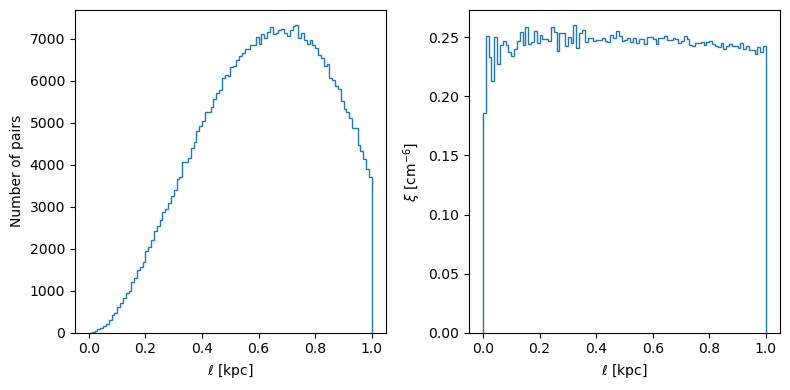

In [3]:
from pyvsf import twopoint_correlation

# generate random density values (for the sake of argument,
# imagine that they have units of cm^-3)
dens = generator.rand(1000)

# separation bins
dist_bin_edges = np.arange(101.0) / 100

corr_result_dict = twopoint_correlation(
    pos_a=pos, val_a=dens,
    pos_b=None, val_b=None,
    dist_bin_edges=dist_bin_edges,
    stat_kw_pairs=[("mean", {})],
    nproc=1,
)[0]

fig, ax_arr = plt.subplots(1, 2, figsize=(8, 4), sharex=True)    

plot_binned_data(ax_arr[0], dist_bin_edges, corr_result_dict["counts"])
ax_arr[0].set_ylabel("Number of pairs")
plot_binned_data(ax_arr[1], dist_bin_edges, corr_result_dict["mean"])
ax_arr[1].set_ylabel(r"$\xi\ [{\rm cm}^{-6}]$ ")

for ax in ax_arr:
    ax.set_xlabel(r"$\ell\ [{\rm kpc}]$")

fig.tight_layout()

You can also evaluate the equivalent of "cross-vsf" and cross-correlation between 2 different collections of data. Suppose we have 2 separate collections of points (collection $a$ and collection $b$). This is equaivalent to:

$$
\langle|\delta {\bf v}|^n\rangle_{\rm cross}(\ell) = 
    \frac{\sum_i^{N_a} \sum_j^{N_b} W_\ell(|{\bf r}_{a,i}-{\bf r}_{b,j}|) |{\bf v}({\bf r}_{a,i}) - {\bf v}({\bf r}_{b,j})|^n }{\sum_i^{N_a} \sum_j^{N_b} W_\ell(|{\bf r}_{a,i}-{\bf r}_{b,j}|)}
$$

$$
\xi_{\rm cross}(\ell) = 
    \frac{\sum_i^{N_a} \sum_j^{N_b} W_\ell(|{\bf r}_{a,i}-{\bf r}_{b,j}|) \rho({\bf r}_{a,i})\rho({\bf r}_{b,j}) }{\sum_i^{N_a} \sum_j^{N_b} W_\ell(|{\bf r}_{a,i}-{\bf r}_{b,j}|)}
$$

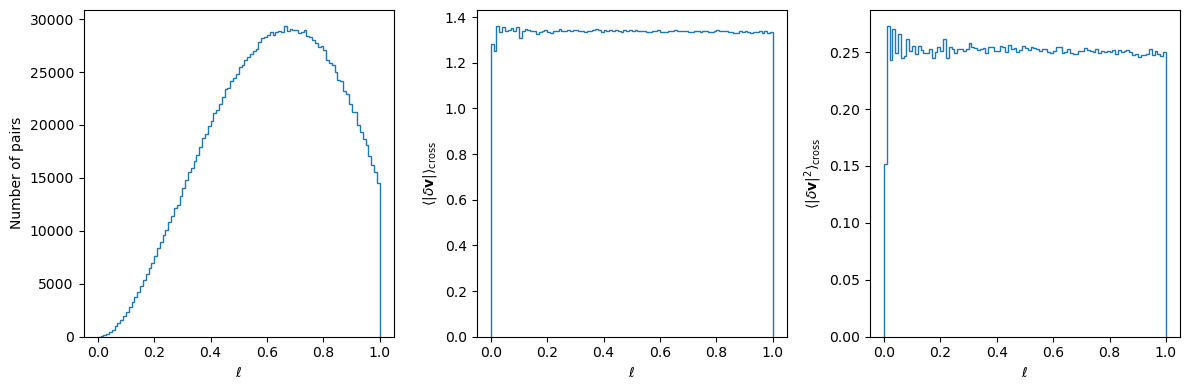

In [4]:
# generate the other points
generator_b = np.random.RandomState(seed=5242)
pos_b, vel_b = generator_b.rand(3, 2000), generator_b.rand(3, 2000) * 2 - 1.0

# stat_kw_pairs can technically accept multiple values
# - this function returns a list where the ith entry
#   corresponds to a dictionary which holds data for
#   the ith entry of stat_kw_pairs
result_dict = vsf_props(
    pos_a=pos,
    pos_b=pos_b,
    val_a=vel,
    val_b=vel_b,
    dist_bin_edges=dist_bin_edges,
    stat_kw_pairs=[("variance", {})],
    nproc=1,
)[0]

fig, ax_arr = plt.subplots(1, 3, figsize=(12, 4), sharex=True)

plot_binned_data(ax_arr[0], dist_bin_edges, result_dict["counts"])
ax_arr[0].set_ylabel("Number of pairs")
plot_binned_data(ax_arr[1], dist_bin_edges, result_dict["mean"])
ax_arr[1].set_ylabel(r"$\langle|\delta{\bf v}|\rangle_{\rm cross}$")
plot_binned_data(ax_arr[2], dist_bin_edges, result_dict["variance"])
ax_arr[2].set_ylabel(r"$\langle|\delta{\bf v}|^2\rangle_{\rm cross}$")

for ax in ax_arr:
    ax.set_xlabel(r"$\ell$")

fig.tight_layout()

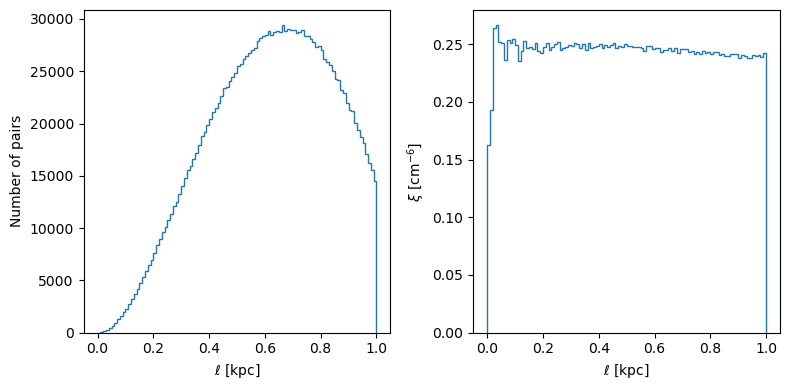

In [5]:
# generate random density values (for the sake of argument,
# imagine that they have units of cm^-3)
dens_b = generator_b.rand(2000)

corr_result_dict = twopoint_correlation(
    pos_a=pos, val_a=dens,
    pos_b=pos_b, val_b=dens_b,
    dist_bin_edges=dist_bin_edges,
    stat_kw_pairs=[("mean", {})],
    nproc=1,
)[0]

fig, ax_arr = plt.subplots(1, 2, figsize=(8, 4), sharex=True)    

plot_binned_data(ax_arr[0], dist_bin_edges, corr_result_dict["counts"])
ax_arr[0].set_ylabel("Number of pairs")
plot_binned_data(ax_arr[1], dist_bin_edges, corr_result_dict["mean"])
ax_arr[1].set_ylabel(r"$\xi\ [{\rm cm}^{-6}]$ ")

for ax in ax_arr:
    ax.set_xlabel(r"$\ell\ [{\rm kpc}]$")

fig.tight_layout()